## generator test

In [11]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath("./signals"))
sys.path.append(os.path.abspath("./data"))

from dataset import create_labeled_dataset, get_kfold_splits

## dataset test

Shape of X: (2, 150)
Shape of y: (2,)
Labels: [0 1]


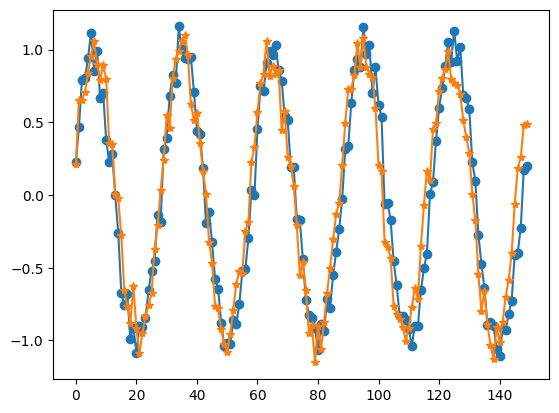

In [12]:
# Signal configuration: use sine signals with different freqs
class_configs = [
    (0, 'sine', {'args': [5, 0.1, 300, 5]}),
    (1, 'sine', {'args': [5.1, 0.1, 300, 5]}),
]

# Generate data
n_samples_per_class = 1
X, y = create_labeled_dataset(class_configs, n_samples_per_class, subsample_step=10, transient=0)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("Labels:", np.unique(y))

plt.plot(X[0], 'o-')
plt.plot(X[1], '*-')
plt.show()

In [22]:
dt = 0.1
pseudo_period = 30
npp = [2, 3, 5, 7, 10, 30, 50, 100]            # change the number of points per period here!
step = [int(pseudo_period / elem / dt) for elem in npp]

In [23]:
step

[150, 100, 60, 42, 30, 10, 5, 2]

Shape of X: (2, 17)
Shape of y: (2,)
Labels: [0 1]


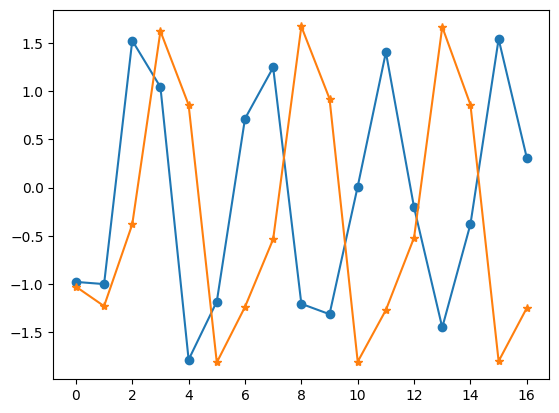

In [25]:
fhn_args = [0.8, 0.7, 0.08, 0.5, 0.02]  # [b0, b1, epsilon, I, noise_strength]
fhn_kwargs = {
    'length': 500,
    'dt': 0.1,
    'x0': [0, 0],
    'args': fhn_args
}

class_configs = [
    (0, 'fhn', {'length':750, 'dt': 0.1, 'x0': [0,0], 'args':[0.1, 1.2, 0.2, 0, 0.01]}),
    (1, 'fhn', {'length':750, 'dt': 0.1, 'x0': [0,0], 'args':[0.1, 1, 0.2, 0.0, 0.01]} ),
]

n_samples_per_class = 1
X, y = create_labeled_dataset(class_configs, n_samples_per_class, return_time = False, subsample_step=step[-5], transient=50)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("Labels:", np.unique(y))

plt.plot( X[0, :], 'o-')
plt.plot( X[1, :], '*-')
plt.show()

In [28]:
periods = [300, 450, 600, 900, 1200, 1500, 3000]
dt = 0.1
period = 30

for p in periods:
    print(p/(period/dt))

1.0
1.5
2.0
3.0
4.0
5.0
10.0


In [3]:
b0 = 0.1

b1 = 1
db1 = 0.2
b12g = np.arange(1.3, 2.2, db1)
b12s = np.linspace(b1, 1.2, 10)
b12 = np.concatenate((b12s, b12g))
deltab12 = b12 - b1

In [4]:
b12

array([1.        , 1.02222222, 1.04444444, 1.06666667, 1.08888889,
       1.11111111, 1.13333333, 1.15555556, 1.17777778, 1.2       ,
       1.3       , 1.5       , 1.7       , 1.9       , 2.1       ])

In [4]:
# After creating your dataset
X, y = create_labeled_dataset(class_configs, n_samples_per_class=10)

# Get K-Fold indices
splits = get_kfold_splits(X, y, n_splits=5)
splits_frames = []
# Loop through folds
for i, (train_idx, test_idx) in enumerate(splits):
    X_train = [X[j] for j in train_idx]
    X_test  = [X[j] for j in test_idx]
    y_train = [y[j] for j in train_idx]
    y_test  = [y[j] for j in test_idx]
    splits_frames.append((X_train, X_test, y_train, y_test))
    
    print(f"Fold {i + 1}:")
    print(f"  Train size: {len(X_train)}")
    print(f"  Test size:  {len(X_test)}")


Fold 1:
  Train size: 16
  Test size:  4
Fold 2:
  Train size: 16
  Test size:  4
Fold 3:
  Train size: 16
  Test size:  4
Fold 4:
  Train size: 16
  Test size:  4
Fold 5:
  Train size: 16
  Test size:  4


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for train_idx, test_idx in splits:
    X_train = [X[i] for i in train_idx]
    y_train = [y[i] for i in train_idx]
    X_test = [X[i] for i in test_idx]
    y_test = [y[i] for i in test_idx]
    
    # Flatten or preprocess if needed
    X_train_flat = [x.flatten() for x in X_train]
    X_test_flat = [x.flatten() for x in X_test]
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    clf = SVC()
    clf.fit(X_train_flat, y_train)
    y_pred = clf.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00
Accuracy: 1.00
Accuracy: 1.00
Accuracy: 1.00
Accuracy: 1.00


## features test

Shape of extracted features: (16, 22)


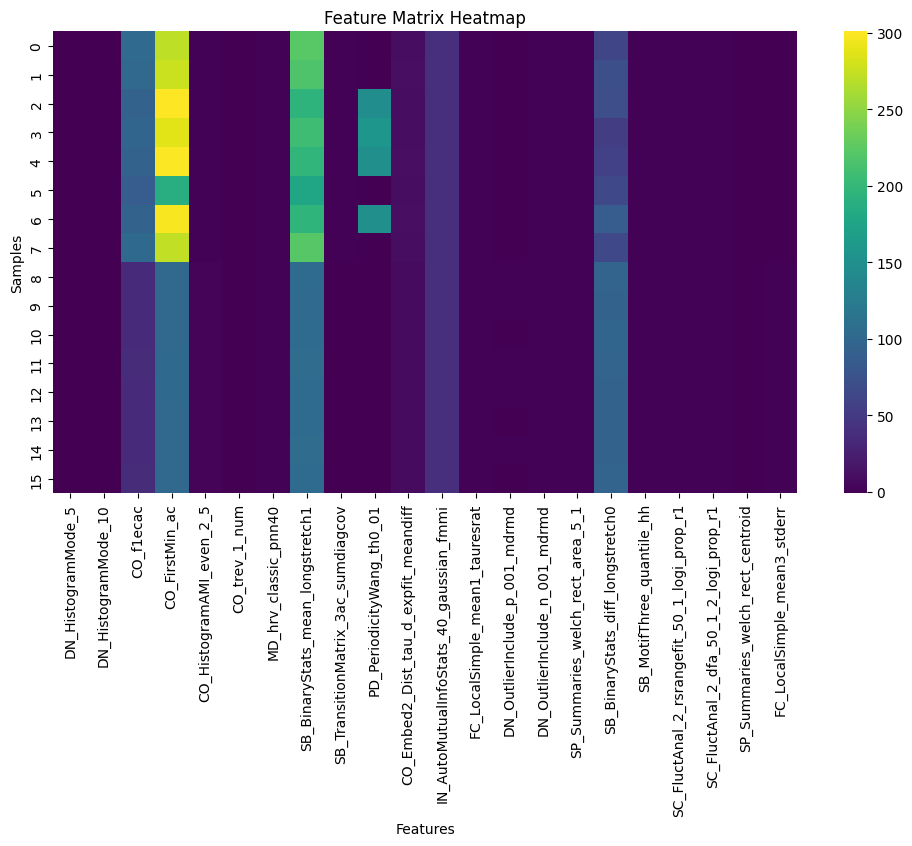

In [6]:
sys.path.append(os.path.abspath("../features"))
import seaborn as sns
from features import extract_features

# Extract features from raw time series
features = extract_features(X_train)
print(f"Shape of extracted features: {features.shape}")

# Plot feature heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(features, cmap='viridis')
plt.title("Feature Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()



In [7]:
assert features.shape[0] == len(y_train)
assert features.shape[1] == 22

In [8]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set path and import
sys.path.append(os.path.abspath("../preprocessing"))
from preprocessing import apply_pca

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
X_pca, pca_model, scaler = apply_pca(X_scaled, n_components=2)

# Print explained variance
print("Explained variance ratio:", pca_model.explained_variance_ratio_)

Explained variance ratio: [0.84494771 0.0639001 ]


In [9]:
print("X shape (features):", features.shape)
print("y shape:", y_train.shape if hasattr(y_train, 'shape') else len(y_train))

X shape (features): (16, 22)
y shape: (16,)


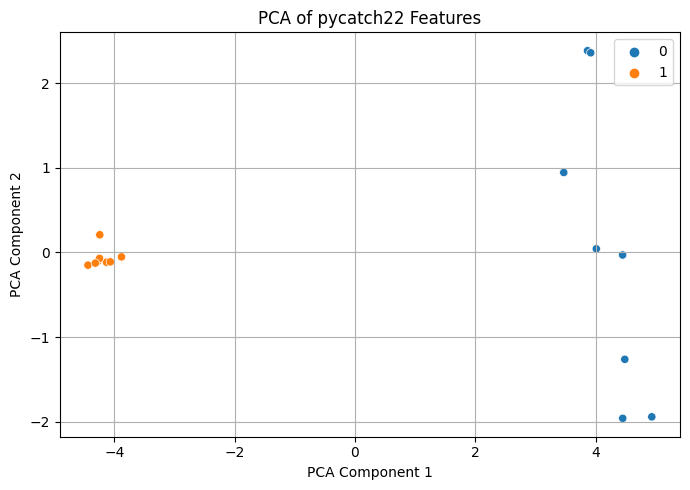

In [10]:
# Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of pycatch22 Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
X_pca.shape

(16, 2)

## classification

In [12]:
sys.path.append(os.path.abspath("../models"))
from sklearn.svm import SVC

from classification import evaluate_model_auc, evaluate_single_fold, run_experiment

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Example classifier
clf = SVC(probability=True)

# Run AUC evaluation
auc_scores = evaluate_model_auc(splits_frames, clf)

# Mean AUC
print("Mean AUC across folds:", np.mean(auc_scores))

Fold AUC: 1.000
Fold AUC: 1.000
Fold AUC: 1.000
Fold AUC: 1.000
Fold AUC: 1.000
Mean AUC across folds: 1.0


In [14]:
acc_scores = evaluate_model_auc(splits_frames, clf)
# Mean AUC
print("Mean AUC across folds:", np.mean(acc_scores))

Fold AUC: 1.000
Fold AUC: 1.000
Fold AUC: 1.000
Fold AUC: 1.000
Fold AUC: 1.000
Mean AUC across folds: 1.0


## all

In [84]:
# generating signals
class_configs = [
    (0, 'sine', {'args': [5, 0.1, 5, 3]}),
    (1, 'sine', {'args': [5.5, 0.1, 5, 3]}),
]
n_samples_per_class = 100
X, y = create_labeled_dataset(class_configs, n_samples_per_class, return_time=False)

In [85]:
# splits
splits = get_kfold_splits(X, y, n_splits=5)

splits_frames = []
# Loop through folds
for i, (train_idx, test_idx) in enumerate(splits):
    X_train = [X[j] for j in train_idx]
    X_test  = [X[j] for j in test_idx]
    y_train = [y[j] for j in train_idx]
    y_test  = [y[j] for j in test_idx]
    
    splits_frames.append((X_train, X_test, y_train, y_test))


In [86]:
auc_raw, auc_pca, auc_feat, auc_feat_pca = [], [], [], []

for i, (train_idx, test_idx) in enumerate(splits):
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # raw
    clf = SVC(probability=True)
    auc_raw.append(evaluate_single_fold(x_train, x_test, y_train, y_test, clf))

    # raw + pca
    clf = SVC(probability=True)
    x_train_pca, pca_model, scaler = apply_pca(x_train, n_components=2)
    x_test_pca = scaler.transform(x_test)
    x_test_pca = pca_model.transform(x_test_pca)
    auc_pca.append(evaluate_single_fold(x_train_pca, x_test_pca, y_train, y_test, clf))

    # features
    clf = SVC(probability=True)
    x_train_feat = extract_features(x_train)
    x_test_feat = extract_features(x_test)
    auc_feat.append(evaluate_single_fold(x_train_feat, x_test_feat, y_train, y_test, clf))

    # features + pca
    clf = SVC(probability=True)
    x_train_feat_pca, pca_model, scaler = apply_pca(x_train_feat, n_components=2)
    x_test_feat_pca = scaler.transform(x_test_feat)
    x_test_feat_pca = pca_model.transform(x_test_feat_pca)
    auc_feat_pca.append(evaluate_single_fold(x_train_feat_pca, x_test_feat_pca, y_train, y_test, clf))


/home/consuelo/Documentos/GitHub/TestCatch22/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/consuelo/Documentos/GitHub/TestCatch22/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/consuelo/Documentos/GitHub/TestCatch22/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/consuelo/Documentos/GitHub/TestCatch22/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/consuelo/Documentos/GitHub/TestCatch22/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature nam

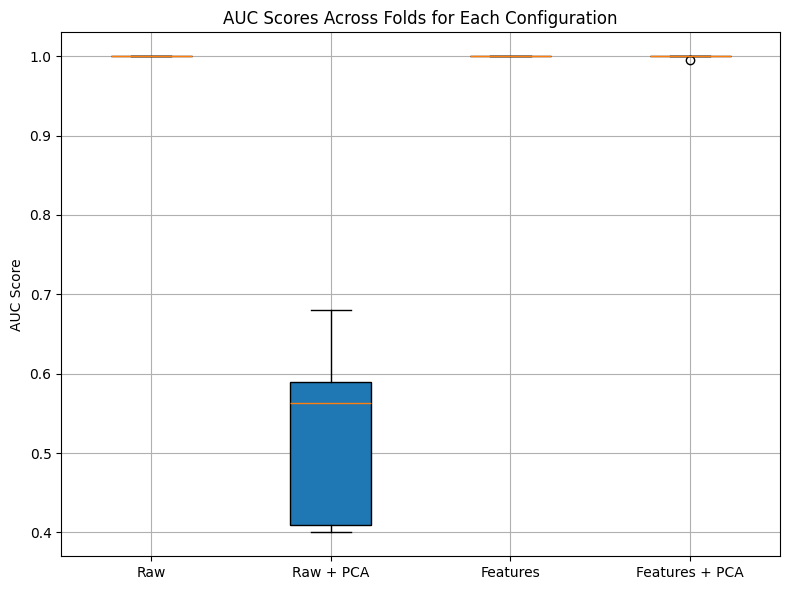

In [87]:
# Boxplot of AUCs
plt.figure(figsize=(8, 6))
plt.boxplot(
    [auc_raw, auc_pca, auc_feat, auc_feat_pca],
    labels=["Raw", "Raw + PCA", "Features", "Features + PCA"],
    patch_artist=True
)
plt.title("AUC Scores Across Folds for Each Configuration")
plt.ylabel("AUC Score")
plt.grid(True)
plt.tight_layout()
plt.show()

## pipeline

In [88]:
results = run_experiment(X, y, splits)


In [89]:
def plot_experiment_results(results_dict):
    """
    Plots a boxplot of AUC scores for different data configurations.

    Parameters:
    - results_dict (dict): Dictionary with keys 'raw', 'pca', 'features', 'features_pca',
                           each mapping to a list of AUC scores across folds.
    """
    labels = ["Raw", "Raw + PCA", "Features", "Features + PCA"]
    data = [
        results_dict["raw"],
        results_dict["pca"],
        results_dict["features"],
        results_dict["features_pca"]
    ]

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.ylabel("AUC Score")
    plt.title("Classification AUC across Configurations")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

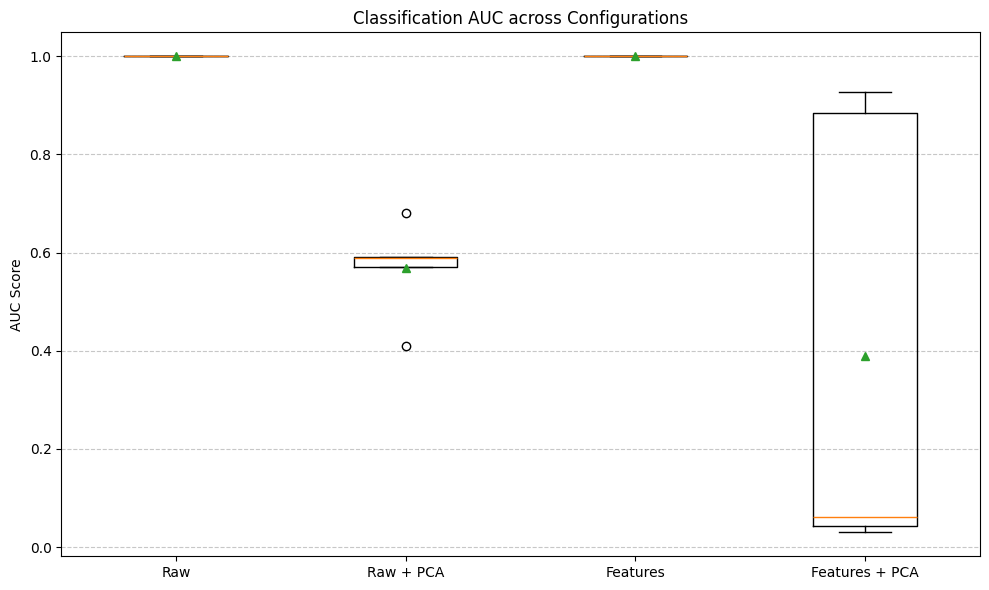

In [90]:
plot_experiment_results(results)

## sweep

In [91]:
from tqdm import tqdm

In [92]:
f0 = 5
df = 0.05
f1 = [f0 + df*i for i in range(0,15,1)]
dfreq = [df*i for i in range(0,15,1)]

npoints = 5
nperiods = 4

noise = 10
samples = 75 + 25

In [98]:
all_results = []
for i, freq in enumerate(tqdm(f1)):
    results = []
    X, y = create_labeled_dataset(
        [(0, 'sine', {'args': [f0, 0.1, npoints, nperiods]}),
         (1, 'sine', {'args': [freq, 0.1, npoints, nperiods]})],
        n_samples_per_class=100
    )
    splits = get_kfold_splits(X, y, n_splits=5, stratified = False)

    results = run_experiment(X, y, splits)

    all_results.append({
        'df': round(freq- f0, 3),
        'raw': results['raw'],
        'pca': results['pca'],
        'features': results['features'],
        'features_pca': results['features_pca']
    })


100%|██████████| 15/15 [00:04<00:00,  3.36it/s]


In [107]:
all_results

[{'df': 0.0,
  'raw': [0.5087719298245614,
   0.4285714285714286,
   0.5874999999999999,
   0.4305555555555556,
   0.49999999999999994],
  'pca': [0.5225563909774436,
   0.4335839598997494,
   0.58875,
   0.422979797979798,
   0.4696969696969697],
  'features': [0.5238095238095237,
   0.4912280701754386,
   0.47750000000000004,
   0.45454545454545453,
   0.5025252525252526],
  'features_pca': [0.6265664160401003,
   0.41854636591478694,
   0.4775,
   0.5252525252525252,
   0.6085858585858586]},
 {'df': 0.05,
  'raw': [0.3208020050125313,
   0.5701754385964912,
   0.5,
   0.5782828282828283,
   0.37878787878787884],
  'pca': [0.45614035087719296,
   0.6666666666666667,
   0.4125,
   0.5050505050505051,
   0.44191919191919193],
  'features': [0.656641604010025,
   0.7142857142857143,
   0.6,
   0.6717171717171717,
   0.3611111111111111],
  'features_pca': [0.4887218045112782,
   0.38972431077694236,
   0.3625,
   0.48484848484848486,
   0.6388888888888888]},
 {'df': 0.1,
  'raw': [0.8947

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten all results
records = []
for entry in all_results:
    df = entry["df"]
    for method in ["raw", "pca", "features", "features_pca"]:
        for auc in entry[method]:
            records.append({"Δf": df, "Method": method, "AUC": auc})

df_results = pd.DataFrame.from_records(records)

In [100]:
summary = (
    df_results
    .groupby(["Δf", "Method"])["AUC"]
    .agg(["median", "std"])
    .reset_index()
)

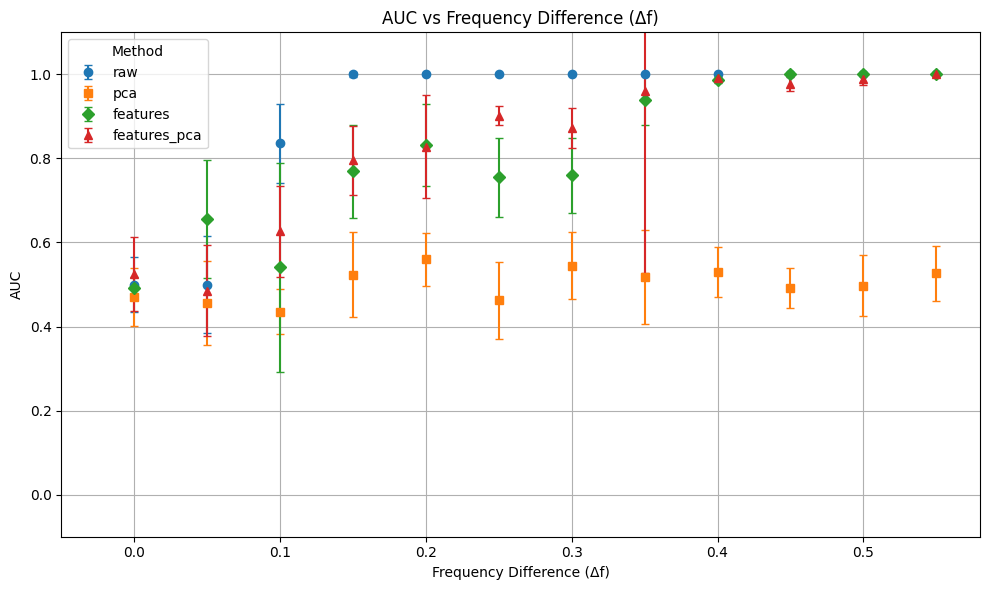

In [106]:

# Define unique marker shapes per method
markers = {
    "raw": "o", 
    "pca": "s", 
    "features": "D", 
    "features_pca": "^"
}

plt.figure(figsize=(10, 6))

# Plot each method separately with its marker shape
for method, marker in markers.items():
    data = summary[summary["Method"] == method]
    plt.errorbar(
        data["Δf"], data["median"], yerr=data["std"], 
        label=method, marker=marker, linestyle='', capsize=3
    )

plt.title("AUC vs Frequency Difference (Δf)")
plt.xlabel("Frequency Difference (Δf)")
plt.ylabel("AUC")
plt.legend(title="Method")
plt.grid(True)
plt.tight_layout()
plt.ylim(-0.1, 1.1)
plt.xlim(-0.05, 0.58)
plt.show()


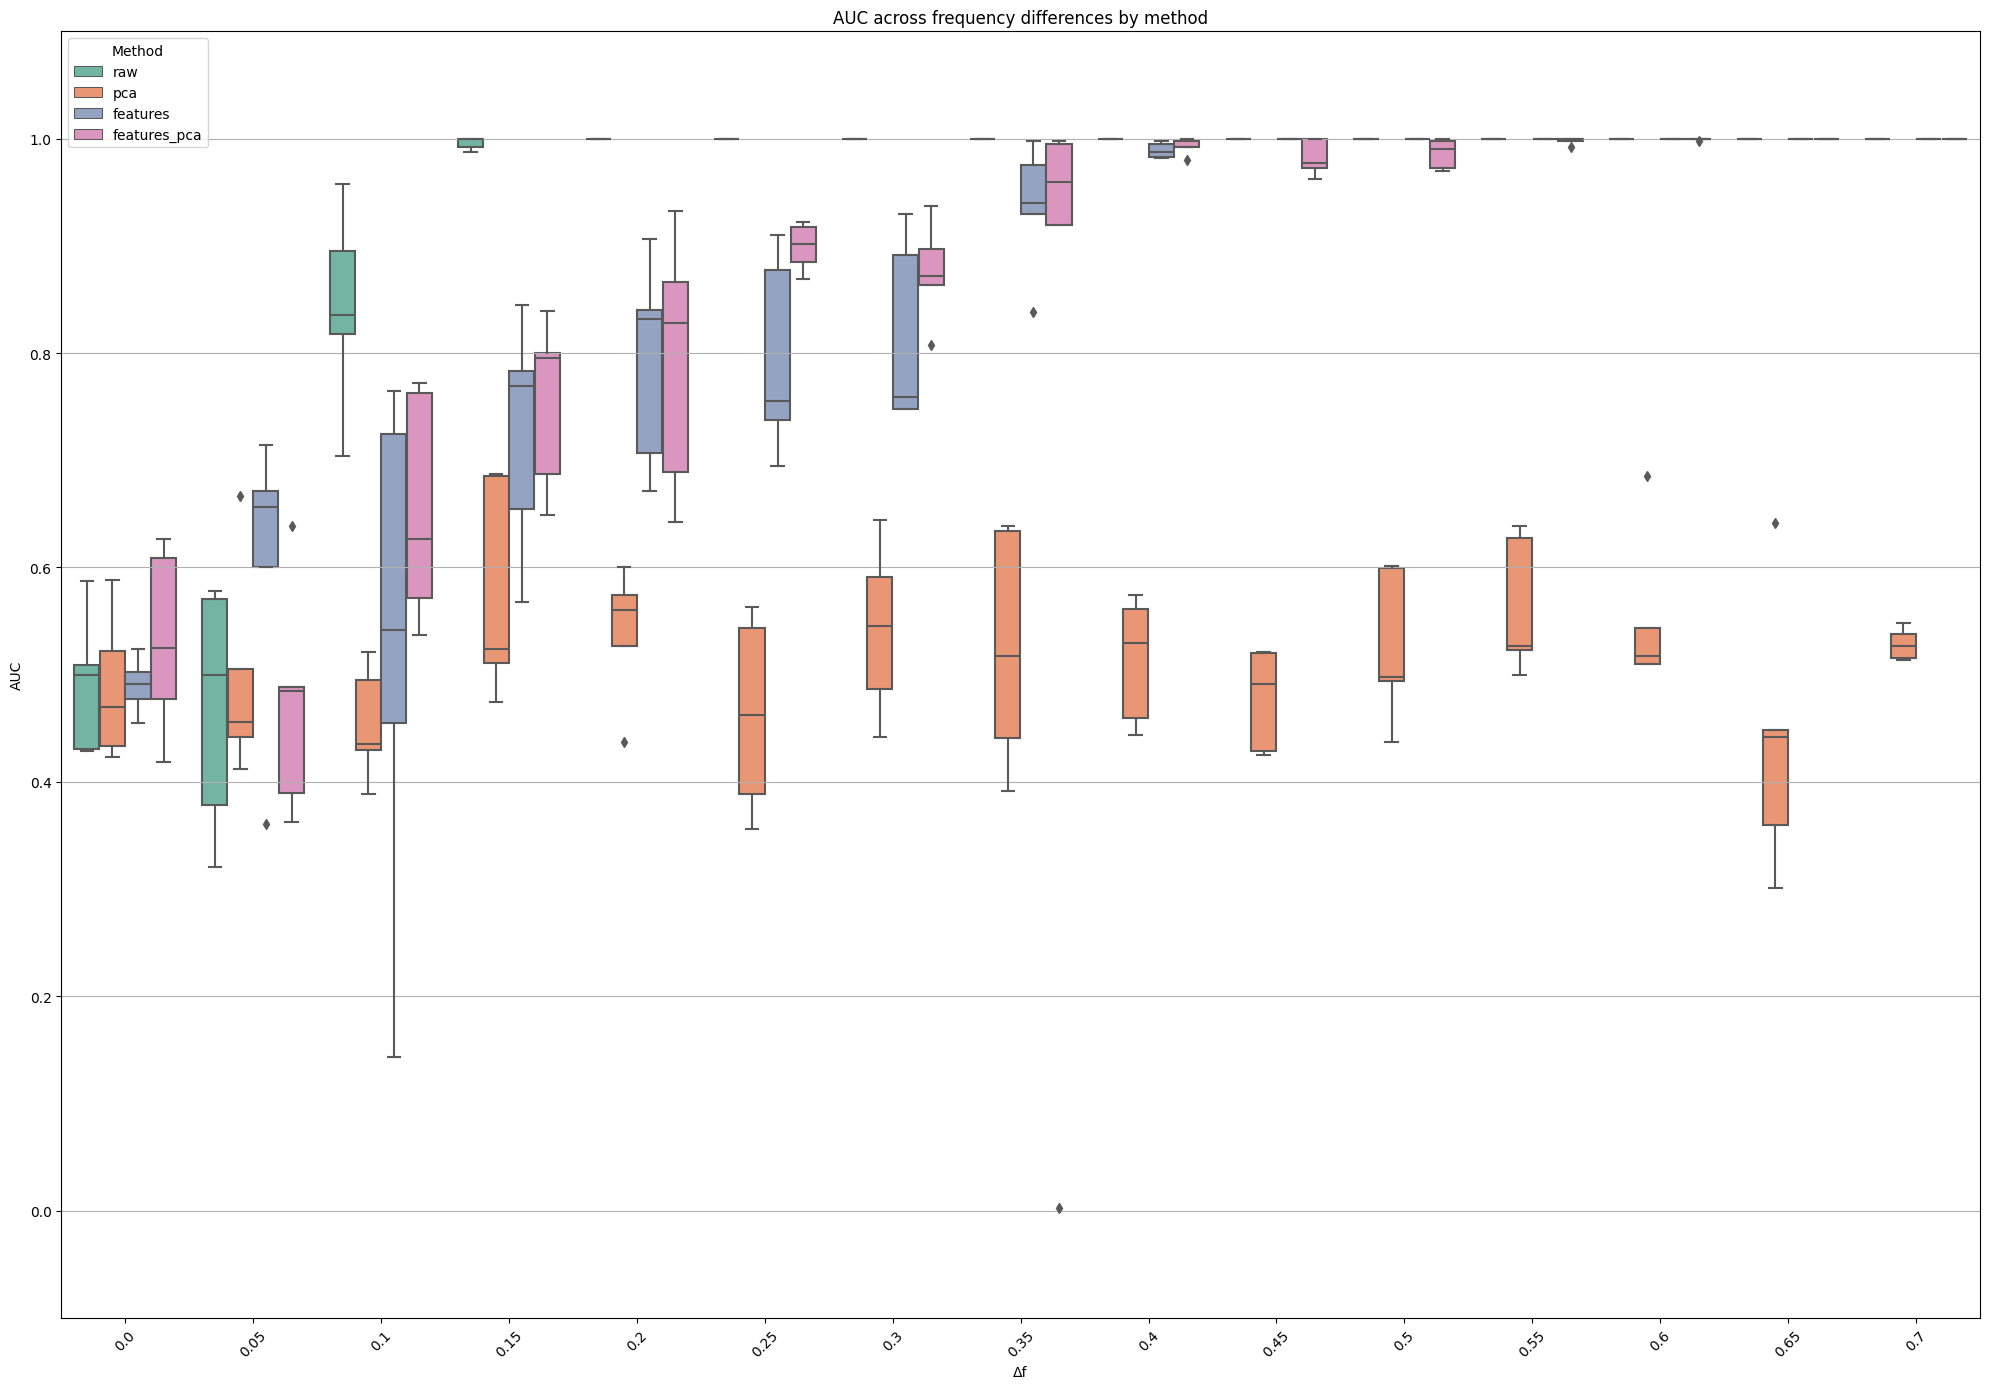

In [102]:
plt.figure(figsize=(20, 14))
sns.boxplot(data=df_results, x="Δf", y="AUC", hue="Method", palette="Set2")
plt.title("AUC across frequency differences by method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis="y")
plt.legend(title="Method")
plt.ylim(-0.1, 1.1)
plt.show()